# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [96]:
dataset = pd.read_csv("Social_Network_Ads.csv")
x = dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values

In [97]:
print(x.shape)
print(x[:5:])

(400, 2)
[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]


In [98]:
print(y.shape)
print(y[:5:])

(400,)
[0 0 0 0 0]


## Splitting the dataset into the Training set and Test set

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [100]:
print(x_train.shape)
print(x_train[:5:])

(320, 2)
[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]]


In [101]:
print(x_test.shape)
print(x_test[:5:])

(80, 2)
[[   30 87000]
 [   38 50000]
 [   35 75000]
 [   30 79000]
 [   35 50000]]


In [102]:
print(y_train.shape)
print(y_train[:5:])

(320,)
[1 0 0 0 1]


In [103]:
print(y_test.shape)
print(y_test[:5:])

(80,)
[0 0 0 0 0]


## Feature Scaling

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [105]:
print(x_train.shape)
print(x_train[:5:])

(320, 2)
[[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]]


In [106]:
print(x_test.shape)
print(x_test[:5:])

(80, 2)
[[-0.79895082  0.49460758]
 [-0.02126485 -0.57735906]
 [-0.31289709  0.14694273]
 [-0.79895082  0.26283101]
 [-0.31289709 -0.57735906]]


## Training the K-NN model on the Training set

In [107]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [108]:
custom_res = classifier.predict(sc.transform([[32, 150000]]))
print(custom_res)

[1]


## Predicting the Test set results

In [109]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55  3]
 [ 1 21]]


0.95

## Display the confusion matrix

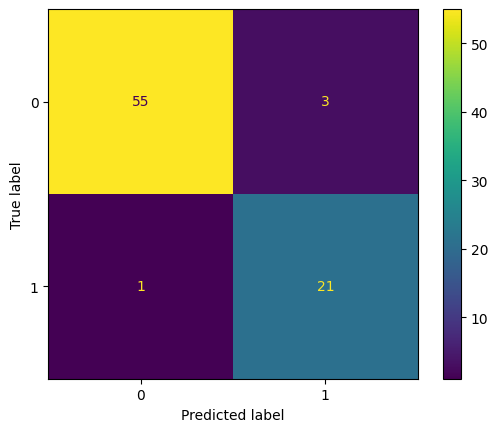

In [111]:
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

## Visualising the Training set results

## Visualising the Test set results